## Gravitational Wave Signal from Merging Black Holes

This time series represents the gravitational wave signal amplitude generated from a pair of black holes spiraling towards each other and eventually merging. As the black holes spiral inwards, both the amplitude and the frequency of the gravitational wave signal increase over time. The following describes the mathematical formulation used to simulate this signal:

### Mathematical Description

1. **Time Variable**:
   - $( T = 100 $) : Total time.
   - $( \Delta t = 0.1 $) : Time step.
   - $( t = \{0, 0.1, 0.2, \ldots, 99.9\} $) : Discrete time points.

2. **Amplitude of the Gravitational Wave Signal**:
   - $( A_0 = 0.01 $) : Initial amplitude.
   - $( \alpha = 0.0001 $) : Amplitude growth rate.
   - $( A(t) = A_0 + \alpha \cdot t $) : Amplitude increases linearly over time.

3. **Frequency of the Gravitational Wave Signal**:
   - $( f_0 = 0.05 $) : Initial frequency.
   - $( \beta = 0.0005 $) : Frequency increase rate.
   - $( f(t) = f_0 + \beta \cdot t $) : Frequency increases linearly over time.

4. **Gravitational Wave Signal**:
   - The signal is modeled as a sinusoidal wave with time-varying amplitude and frequency.
   - $( S(t) = A(t) \cdot \sin(2 \pi f(t) t) $).
   - Noise $( N(t) $) is added to simulate real-world observations.
   - $( N(t) $) is normally distributed with a standard deviation of 0.015.

5. **Noisy Signal**:
   - $( S_{\text{noisy}}(t) = S(t) + N(t) $).

### Implementation

The following Python code generates the synthetic gravitational wave signal, adds noise, and saves the resulting data to an Excel file.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Define parameters for the synthetic gravitational wave signal
initial_amplitude = 0.01  # Initial amplitude of the wave
amplitude_growth_rate = 0.0001  # Rate at which amplitude increases
initial_frequency = 0.05  # Initial frequency of the wave
frequency_increase_rate = 0.0005  # Rate at which frequency increases
T = 100  # Total time
dt = 0.1  # Time step

# Generate time points
t = np.arange(0, T, dt)

# Generate the gravitational wave signal with increasing amplitude and frequency
amplitude = initial_amplitude + amplitude_growth_rate * t
frequency = initial_frequency + frequency_increase_rate * t
signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Add some noise to the signal
noise = np.random.normal(scale=0.015, size=len(t))
noisy_signal = signal + noise

# Create a DataFrame
df = pd.DataFrame({'Time': t, 'Signal': noisy_signal})

df.to_excel('gravitational_wave.xlsx','data')

### Data importation and visualization
Import the excel file and visulaize the data with different techniques

In [2]:
# Exercise 1 ### 6 points: 1 for calling read_excel, 1 for each argument
# Upload the excel file damped_oscillator.xlsx using pandas to a dataframe object
series = pd.read_excel('gravitational_wave.xlsx',
                    sheet_name='data', header=0, index_col=0,
                     dtype=float) 
series

,Time,Signal
0,0.0,0.010862
1,0.1,-0.000251
2,0.2,-0.003808
3,0.3,0.000661
4,0.4,0.010427
...,...,...
995,99.5,-0.020146
996,99.6,0.003456
997,99.7,0.002515
998,99.8,0.006994


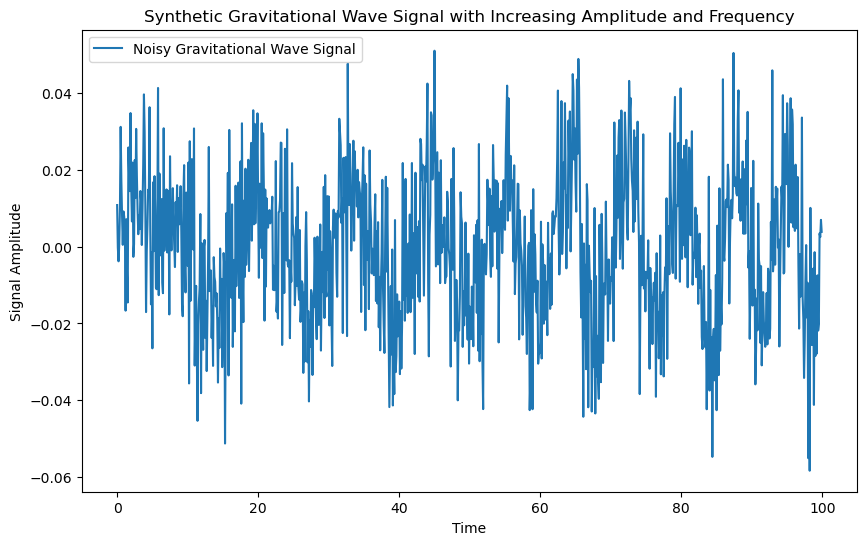

In [3]:
# Exercise 2 ### 5 points: 1 for import, 2 for plot of series, 1 for labels, 1 for plot shown
# Plot time (x-axis) versus position (y-ais) using matplotlib pyplot. Add appropriate labels
import matplotlib.pyplot as plt

# Plot the synthetic gravitational wave data (Signal) vs time
plt.figure(figsize=(10, 6))
plt.plot(series['Time'], series['Signal'], label='Noisy Gravitational Wave Signal')
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal with Increasing Amplitude and Frequency')
plt.legend()
plt.show()

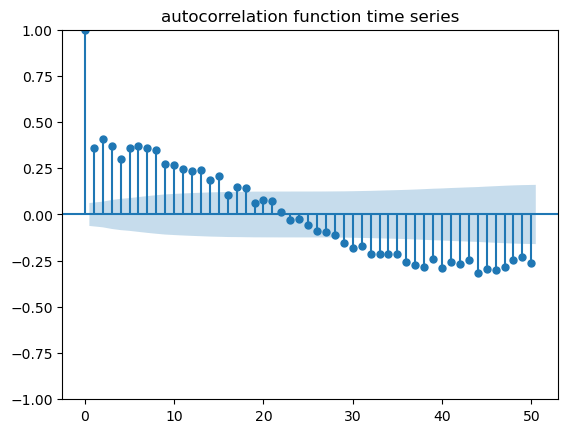

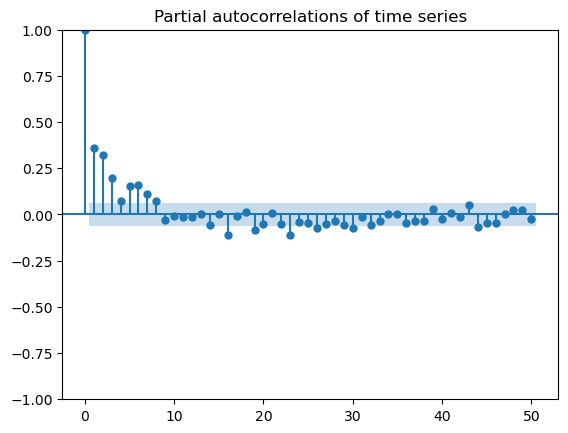

In [4]:
# Exercise 3 ### 5 points: 1 for import, 2 each for acf and pacf
# Plot the autocorrelation function time series of the position data (50 lags for example)
# Plot the partial autocorrelation function time series of the position data (50 lags for example)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(series['Signal'], title='autocorrelation function time series', lags=50)
plot_pacf(series['Signal'], title='Partial autocorrelations of time series', lags=50)
plt.show()

### Modeling and forecasting
After basic drawing and visulazation of the data try to analyze the position data and do some forcasting using the SARIMAX model

In [5]:
# Exercise 4 ### 10 points (see inline)
# import itertools, and use it to generate different combinations of parameters for the SARIMAX model
import itertools ### 1 point

# The p and q parameters are given and equal to 2; as itertools 
p = q = range(2, 3)

# Define the d parameter to be an integer between 0 and 1
d = range(0, 2) ### 1 point

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q)) ### 5 points: 1 list, 1 product, 3 p, d, q

# Generate all different combinations of seasonal p, d and q triplets (i.e., P, D, Q)
# Use a value of 10 for the seasonality S
seasonal_pdq = [(x[0], x[1], x[2], 10) for x in list(itertools.product(p, d, q))] ### 3 points: correct tuple, correct for, correct in

In [6]:
# Exercise 5 ### 16 points (see inline)
# Define a SARIMAX model and identify the optimal parameters according to the AIC criterion
from statsmodels.tsa.statespace.sarimax import SARIMAX ### 1 point
import warnings
import traceback

warnings.filterwarnings("ignore")  # specify to ignore warning messages

# Identification of best model from different combinations of pdq and seasonal_pdq
best_score, best_param, best_paramSeasonal = float("inf"), None, None ### correct initialization: 1 point
for param in pdq:
    for param_seasonal in seasonal_pdq: ### 1 point
        try:
            ### 4 points: 1 point SARIMAX, 1 point passing series, 1 point order, 1 point seasonal order
            mod = SARIMAX(series['Signal'], order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit(disp=False) ### 1 point model fit
            if results.aic < best_score:  ### 1 point cecking aic
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal ### 3 points storing best score/parameters
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e: ### try/except/continue 3 points
            print(f'Exception for ARIMA{param}x{param_seasonal}: {e}')
            traceback.print_exc()
            continue  # if fit fails, just continue to the next parameters combination


ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5413.108993013068
ARIMA(2, 0, 2)x(2, 1, 2, 10) - AIC:-5276.065067488855
ARIMA(2, 1, 2)x(2, 0, 2, 10) - AIC:-5377.970737393331
ARIMA(2, 1, 2)x(2, 1, 2, 10) - AIC:-5278.4652228218165


In [7]:
# Exercise 6 ### 1 point
# Print the best set of parameters according to the AIC
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

The best model is ARIMA(2, 0, 2)x(2, 0, 2, 10) - AIC:-5413.108993013068


In [8]:
# Exercise 7 ### 6 points (see inline)
# Fit the model once again using the optimal parameters, and print a summary of the results
### 4 points: 1 point SARIMAX, 1 point passing series, 1 point order, 1 point seasonal order
mod = SARIMAX(series['Signal'], order=best_param, seasonal_order=best_paramSeasonal, enforce_invertibility=False)
results=mod.fit() ### 1 point model fit
print(results.summary()) ### 1 point print summary

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69953D+00    |proj g|=  1.34131D-01


 This problem is unconstrained.



At iterate    5    f= -2.70942D+00    |proj g|=  4.20919D-01

At iterate   10    f= -2.71094D+00    |proj g|=  9.09775D-01

At iterate   15    f= -2.71172D+00    |proj g|=  3.44608D-01

At iterate   20    f= -2.71183D+00    |proj g|=  4.73887D-03

At iterate   25    f= -2.71206D+00    |proj g|=  4.80628D-02

At iterate   30    f= -2.71498D+00    |proj g|=  1.20061D-01

At iterate   35    f= -2.71519D+00    |proj g|=  2.51544D-02

At iterate   40    f= -2.71555D+00    |proj g|=  6.27771D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     42     93      2     0     0   8.973D-03  -2.716D+00
  F =  -2.7155544965065341     

ABNORMAL_TERMINATION_IN_LNSRCH                              
                                     SARIMAX Results                                      
Dep. Variable:                             Signal   No. Observations:                 1000
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 10)   Log Likelihood                2715.554
Date:                            Mon, 27 May 2024   AIC                          -5413.109
Time:                                    16:37:30   BIC    


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


In [9]:
# Exercise 8 ### 5 points: (see inline)
# Forecast future values for 20 steps
n_forecast = 20  # Number of steps to forecast
forecast = results.get_forecast(steps=n_forecast) ### 2 points: 1 correct method, 1 correct argument
forecast_index = np.arange(T, T + n_forecast * dt, dt) ### 2 points as this is needed for plotting later

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean ### 1 point
conf_int = forecast.conf_int()


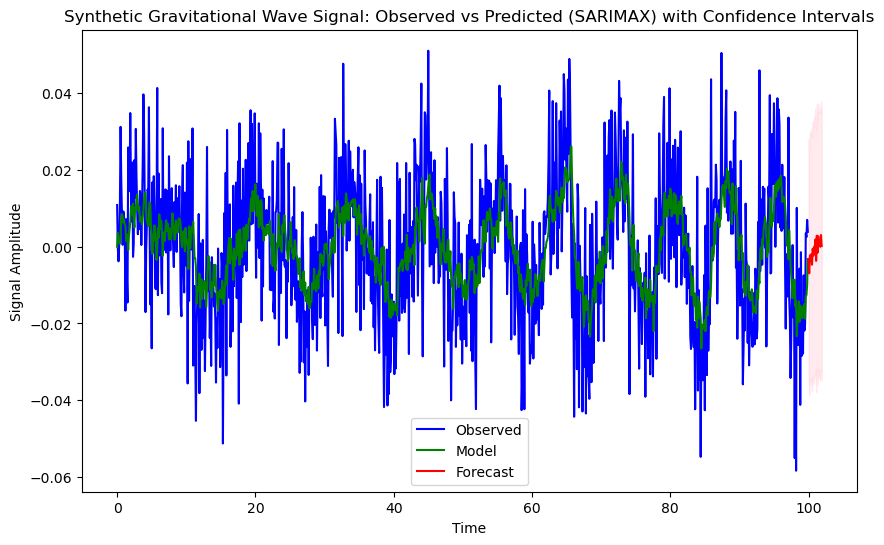

In [10]:
# Exercise 9 ### 9 points: 2 for plot of series, 1 for predictions, 2 plot predictions, 2 plot forecasts, 1 for labels, 1 for plot shown
# Plot the results, the predicted trend according to the model, and the forecast
plt.figure(figsize=(10, 6))
predictions = results.predict()
# Plot the original data i.e. time (x-axis) vs position
plt.plot(series['Time'].to_numpy(), series['Signal'].to_numpy(), label='Observed', color='blue')
# Plot the time (x-axis) vs predictions 
plt.plot(series['Time'].to_numpy(), predictions.to_numpy(), label='Model', color='green')
# Plot the forecast index (x-axis) vs forecast values
plt.plot(forecast_index, forecast_values.to_numpy(), label='Forecast', color='red')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Signal Amplitude')
plt.title('Synthetic Gravitational Wave Signal: Observed vs Predicted (SARIMAX) with Confidence Intervals')
plt.legend()
plt.show()

### Error analysis
Analyse the errors of the predictions

In [11]:
# # Exercise 10 ### 14 points (see inline)
# Compute the:
#   Sum of Squares Total (SST),
#   Summ of Squares Error (SSE),
#   Sum of Squares Regression (SSR),
# and then the coefficient of determination (R²) 
observed = series['Signal'] ### 1 point observed
mean_observed = np.mean(observed) ### 1 point mean
sst = np.sum((observed - mean_observed) ** 2) ### 3 points: 1 sum, 1 arguments, 1 power of 2
sse = np.sum((observed - predictions) ** 2) ### 3 points: 1 sum, 1 arguments, 1 power of 2
ssr = sst - sse ### 3 points
r2 = 1 - (sse / sst) ### 3 points

# Print the results
print(f'SST: {sst:.2f}')
print(f'SSE: {sse:.2f}')
print(f'SSR: {ssr:.2f}')
print(f'R²: {r2:.2f}')


SST: 0.36
SSE: 0.26
SSR: 0.10
R²: 0.29


In [12]:
# # Exercise 11 ### 12 points (see inline)
# Define the degrees of freedom 
n = len(observed)  # Number of observations
p = len(results.params)  # Number of predictors in SARIMAX

# Calculate MST, MSE, MSR, and F-score
mst = sst / (n - 1) ### 3 points
mse = sse / (n - p - 1) ### 3 points
msr = ssr / p ### 3 points
f_score = msr / mse ### 3 points

# Print the results
print(f'MST: {mst:.2f}')
print(f'MSE: {mse:.2f}')
print(f'MSR: {msr:.2f}')
print(f'F-score: {f_score:.2f}')

MST: 0.00
MSE: 0.00
MSR: 0.01
F-score: 44.83


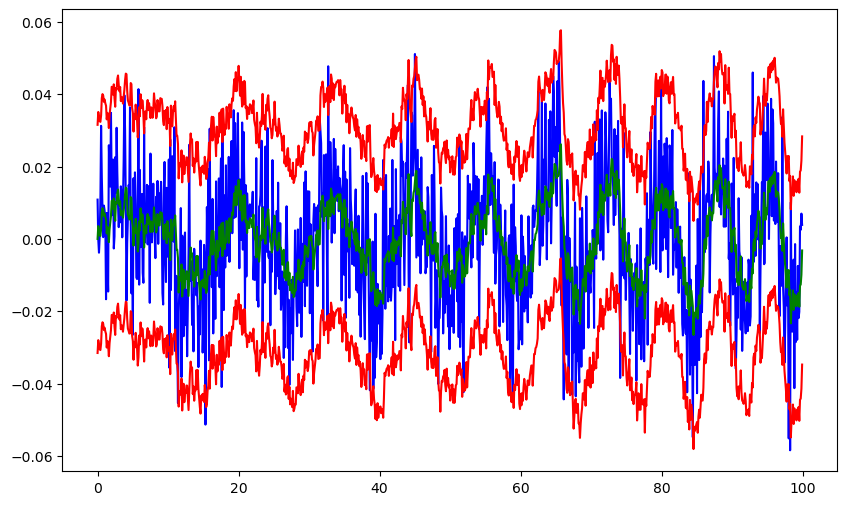

In [13]:
# Exercise 12 ### 11 points (see inline)
# use the mean squared error to assess the precision of the forecast by computing the 95% probability confidence interval 
# plot the original data, the prediction and the lower and upper confidence intervals
from numpy import sqrt ### 1 point correct import
LowerForecast = predictions - 1.96*sqrt(mse) ### 3 points: 1 predictions, 1 correct -1.96, 1 MSE
UpperForecast = predictions + 1.96*sqrt(mse) ### 3 points: 1 predictions, 1 correct +1.96, 1 MSE

plt.figure(figsize=(10, 6))
plt.plot(series['Time'].to_numpy(), series['Signal'].to_numpy(), label='Observed', color='blue') ### 1 point
plt.plot(series['Time'].to_numpy(), predictions.to_numpy(), label='Model', color='green') ### 1 point
plt.plot(series['Time'].to_numpy(), LowerForecast.to_numpy(), label='Model lower bound', color='red') ### 1 point
plt.plot(series['Time'].to_numpy(), UpperForecast.to_numpy(), label='Model upper bound', color='red') ### 1 point
